## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [9]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import urllib.request
import matplotlib.pyplot as plt

## Datos

In [10]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col = ["laptop_ID"])
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00


## Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [50]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00


In [51]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.20,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,2456.34


In [11]:
df["Ram"]= df["Ram"].str.replace("GB", "").astype(float)
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16.0,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8.0,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4.0,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00


In [12]:
df["Weight"]= df["Weight"].str.replace("kg", "").astype(float)
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16.0,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8.0,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4.0,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,256GB SSD,AMD Radeon 530,Windows 10,2.20,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,912.0,14.981579,1.436719,10.10,14.00,15.60,15.6000,18.4
Ram,912.0,8.263158,5.044788,2.00,4.00,8.00,8.0000,64.0
Weight,912.0,2.026937,0.665466,0.69,1.49,2.04,2.3000,4.7
Price_in_euros,912.0,1111.724090,687.959172,174.00,589.00,978.00,1483.9425,6099.0


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [13]:
features = [
    "Inches",
    "Weight",
    "Ram"
]

target = [
    "Price_in_euros"
]

In [14]:
# X = df.drop(['Price_in_euros'], axis=1)
X = df[features].copy()
y = df['Price_in_euros'].copy()
X.shape

(912, 3)

In [15]:
y.shape

(912,)

### 2. Dividir X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### 3. Baseline de modelos


In [18]:
# 4. Crear modelo Random Forest
model = RandomForestRegressor(
    n_estimators=100,  # Número de árboles en el bosque
    random_state=42,   # Semilla para reproducibilidad
    n_jobs=-1          # Usar todos los núcleos del procesador
)

In [21]:
# 5. Validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

In [22]:
# Convertir a MSE positivo y calcular media y desviación estándar
mse_scores = -cv_scores
print(f"MSE Validación Cruzada: {mse_scores.mean():.2f} (± {mse_scores.std():.2f})")

MSE Validación Cruzada: 167038.66 (± 32272.01)


In [24]:
# 6. Entrenar modelo con todos los datos de entrenamiento
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [28]:
# 7. Evaluar en conjunto de prueba
y_pred = model.predict(X_test)
print(f"\nMSE Test: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Test: {r2_score(y_test, y_pred):.2f}")


MSE Test: 227371.10
R² Test: 0.59


In [29]:
root_mean_squared_error(y_test,y_pred)

476.8344583373976

In [31]:
# 8. Importancia de las features
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print("\nImportancia de las features:")
print(feature_importance.sort_values(ascending=False))


Importancia de las features:
Ram       0.649832
Weight    0.301273
Inches    0.048895
dtype: float64


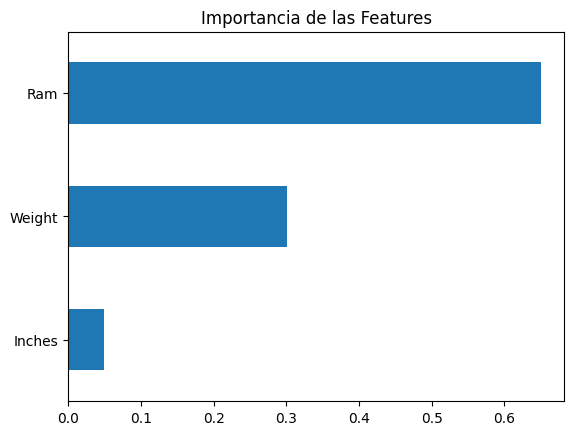

In [32]:
# (Opcional) Visualización de importancia de features
feature_importance.sort_values().plot(kind='barh')
plt.title('Importancia de las Features')
plt.show()

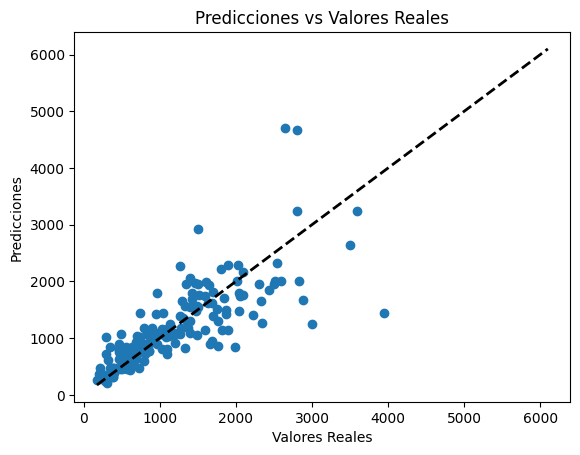

In [33]:
# (Opcional) Gráfico de predicciones vs valores reales
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [43]:
X_pred = pd.read_csv("./data/test.csv", index_col = ["laptop_ID"])
X_pred.index.name = None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [44]:
X_pred["Ram"]= X_pred["Ram"].str.replace("GB", "").astype(float)


In [45]:
X_pred["Weight"]= X_pred["Weight"].str.replace("kg", "").astype(float)

 ## 2. Replicar el procesado para ``test.csv``

In [46]:
X_pred_1 = X_pred[features].copy()

In [47]:
X_pred_1

,Inches,Weight,Ram
209,15.6,2.400,16.0
1281,15.6,2.400,4.0
1168,15.6,1.900,4.0
1231,15.6,2.191,8.0
1020,14.0,1.950,4.0
...,...,...,...
820,17.3,2.900,16.0
948,14.0,1.470,4.0
483,15.6,1.780,8.0
1017,14.0,1.640,4.0


In [48]:
predictions_submit = model.predict(X_pred_1)
predictions_submit

array([1452.02434921,  473.79530886,  479.84250591,  808.47014856,
       1070.49066667,  610.29286   ,  678.64304363, 1435.67792381,
       1671.21732429,  489.3899    , 2272.9651619 , 1687.10714921,
        500.84583442, 1477.7286    , 1057.98774603,  422.95580828,
       2046.70498286, 1449.094     , 1752.00344444,  611.14429198,
       1447.6172    ,  407.69578571, 1128.59819048, 1781.20666667,
        477.26097   ,  808.47014856, 1094.80375714,  841.64064286,
       2427.1937819 , 1087.52563167, 1839.10364714,  464.22551128,
       1404.10084702, 3238.63526833, 2064.2832    , 1986.9783759 ,
        624.35684917, 1558.3044483 ,  839.14513333, 1438.103971  ,
       1015.55131697, 1304.85292866,  567.39119524, 1087.52563167,
       1986.9783759 ,  808.47014856, 1146.17277588,  464.22551128,
        808.47014856,  469.97756311, 2162.2933    ,  808.47014856,
       1065.49811156,  629.90092707, 1783.33733333, 2032.3245    ,
        587.8133308 ,  905.42242588, 1057.98774603,  724.89238

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

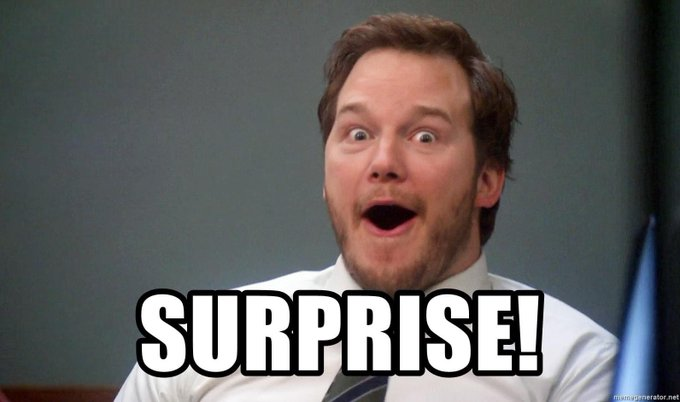

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [49]:
sample = pd.read_csv("data/sample_submission.csv")

In [50]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [51]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [52]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index,"Price_in_euros":predictions_submit })

In [53]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1452.024349
1,1281,473.795309
2,1168,479.842506
3,1231,808.470149
4,1020,1070.490667


In [28]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [54]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [55]:
chequeador(submission)

You're ready to submit!
